In [6]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the requests library
import requests

# import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# starting url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

593

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila do maio
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | tobol
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ambon
Processing Record 9 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | zinder
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | schwarzenbach
Processing Record 18 of Set 1 | kalulushi
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | qui nhon
Processi

Processing Record 33 of Set 4 | nuuk
Processing Record 34 of Set 4 | sao joao da barra
Processing Record 35 of Set 4 | meadow lake
Processing Record 36 of Set 4 | buala
Processing Record 37 of Set 4 | tilichiki
Processing Record 38 of Set 4 | saint anthony
Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | konstantinovo
Processing Record 42 of Set 4 | libertador general san martin
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | abu dhabi
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | caconda
Processing Record 47 of Set 4 | lata
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | kapaa
Processing Record 1 of Set 5 | olafsvik
Processing Record 2 of Set 5 | lagos
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | yasenskaya
Processing Record 5 of Set 5 | samalaeulu
City not found. Skipping..

Processing Record 22 of Set 8 | okhotsk
Processing Record 23 of Set 8 | jumla
Processing Record 24 of Set 8 | dubrajpur
Processing Record 25 of Set 8 | amderma
City not found. Skipping...
Processing Record 26 of Set 8 | mbini
Processing Record 27 of Set 8 | korla
Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | sinegorye
Processing Record 30 of Set 8 | mirabad
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | gizo
Processing Record 33 of Set 8 | kushmurun
Processing Record 34 of Set 8 | severnyy
Processing Record 35 of Set 8 | fillan
Processing Record 36 of Set 8 | tagusao
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | solvychegodsk
Processing Record 39 of Set 8 | muhlhausen
Processing Record 40 of Set 8 | phan rang
City not found. Skipping...
Processing Record 41 of Set 8 | karaul
City not found. Skipping...
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | pozo colorado
Processing R

Processing Record 11 of Set 12 | kalmunai
Processing Record 12 of Set 12 | hirara
Processing Record 13 of Set 12 | gazanjyk
Processing Record 14 of Set 12 | ishigaki
Processing Record 15 of Set 12 | rawson
Processing Record 16 of Set 12 | sarankhola
Processing Record 17 of Set 12 | atar
Processing Record 18 of Set 12 | nynashamn
Processing Record 19 of Set 12 | guanica
Processing Record 20 of Set 12 | tura
Processing Record 21 of Set 12 | burnie
Processing Record 22 of Set 12 | batagay-alyta
Processing Record 23 of Set 12 | balabac
Processing Record 24 of Set 12 | laguna de perlas
Processing Record 25 of Set 12 | lincoln
Processing Record 26 of Set 12 | pingxiang
Processing Record 27 of Set 12 | zhanaozen
Processing Record 28 of Set 12 | qasigiannguit
Processing Record 29 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 30 of Set 12 | akdepe
Processing Record 31 of Set 12 | havoysund
Processing Record 32 of Set 12 | muravlenko
Processing Record 33 of Set 12 | fairban

In [18]:
len(city_data)

543

In [20]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(543)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Do Maio,15.1333,-23.2167,79.59,70,49,10.96,CV,2021-12-12 14:11:35
1,Sao Filipe,14.8961,-24.4956,76.21,68,16,9.69,CV,2021-12-12 14:11:35
2,Tobol,52.6844,62.5794,6.24,92,13,5.99,KZ,2021-12-12 14:11:36
3,Cape Town,-33.9258,18.4232,77.09,50,100,1.99,ZA,2021-12-12 14:11:36
4,Mount Isa,-20.7333,139.5000,82.17,15,0,8.05,AU,2021-12-12 14:11:36
...,...,...,...,...,...,...,...,...,...
538,Madimba,-10.4000,40.3333,82.62,69,100,8.77,TZ,2021-12-12 14:14:00
539,Nanakuli,21.3906,-158.1547,73.35,83,40,0.00,US,2021-12-12 14:14:01
540,Herat,34.5000,62.0000,44.80,47,0,15.01,AF,2021-12-12 14:14:01
541,Tabou,4.4230,-7.3528,84.67,68,23,7.34,CI,2021-12-12 14:14:01


In [22]:
# reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [23]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Do Maio,CV,2021-12-12 14:11:35,15.1333,-23.2167,79.59,70,49,10.96
1,Sao Filipe,CV,2021-12-12 14:11:35,14.8961,-24.4956,76.21,68,16,9.69
2,Tobol,KZ,2021-12-12 14:11:36,52.6844,62.5794,6.24,92,13,5.99
3,Cape Town,ZA,2021-12-12 14:11:36,-33.9258,18.4232,77.09,50,100,1.99
4,Mount Isa,AU,2021-12-12 14:11:36,-20.7333,139.5000,82.17,15,0,8.05
...,...,...,...,...,...,...,...,...,...
538,Madimba,TZ,2021-12-12 14:14:00,-10.4000,40.3333,82.62,69,100,8.77
539,Nanakuli,US,2021-12-12 14:14:01,21.3906,-158.1547,73.35,83,40,0.00
540,Herat,AF,2021-12-12 14:14:01,34.5000,62.0000,44.80,47,0,15.01
541,Tabou,CI,2021-12-12 14:14:01,4.4230,-7.3528,84.67,68,23,7.34


In [25]:
# create the output (csv)
output_data_file = 'weather_data/cities.csv'
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [26]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1639320005.9007776

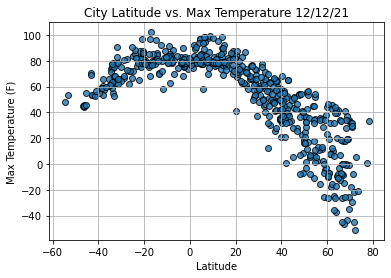

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

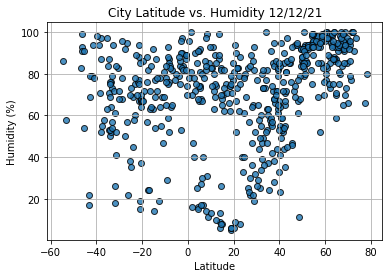

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

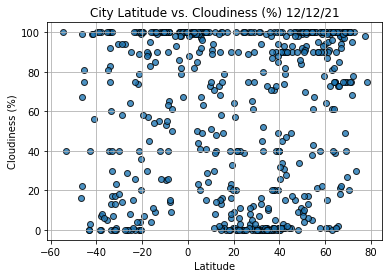

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()